In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Separate data into three groups
X1 = X[y == 0]
X2 = X[y == 1]
X3 = X[y == 2]

In [4]:
# Estimate means and covariance matrices for each group
mean1, cov1 = np.mean(X1, axis=0), np.cov(X1, rowvar=False)
mean2, cov2 = np.mean(X2, axis=0), np.cov(X2, rowvar=False)
mean3, cov3 = np.mean(X3, axis=0), np.cov(X3, rowvar=False)

In [5]:
# Create Gaussian Mixture Models for each group
gmm1 = multivariate_normal(mean=mean1, cov=cov1)
gmm2 = multivariate_normal(mean=mean2, cov=cov2)
gmm3 = multivariate_normal(mean=mean3, cov=cov3)

In [6]:
# Entropies of groups
entropy1 = -np.mean(np.log(gmm1.pdf(X1)))
entropy2 = -np.mean(np.log(gmm2.pdf(X2)))
entropy3 = -np.mean(np.log(gmm3.pdf(X3)))
# Print results
print("Entropy for Group 1:", entropy1)
print("Entropy for Group 2:", entropy2)
print("Entropy for Group 3:", entropy3)

Entropy for Group 1: -0.8979260304752095
Entropy for Group 2: 0.19859161269544695
Entropy for Group 3: 1.1722248936892614


In [7]:
# Estimate mixed population PDF
gmm_mixed = GaussianMixture(n_components=3, covariance_type='full')
gmm_mixed.fit(X)
entropy_mixed = -np.mean(gmm_mixed.score_samples(X))
print("Entropy for Mixed Population:", entropy_mixed)

Entropy for Mixed Population: 1.2013049060973466


In [8]:
# Assuming a single normal distribution for the entire dataset
mean_all, cov_all = np.mean(X, axis=0), np.cov(X, rowvar=False)
gmm_wg = multivariate_normal(mean=mean_all, cov=cov_all)
entropy_wg = -np.mean(np.log(gmm_wg.pdf(X)))
print("Entropy without Groups:", entropy_wg)

Entropy without Groups: 2.5328088437833887


In [9]:
# Estimate entropy with three groups
p1, p2, p3 = 1/3, 1/3, 1/3
entropy_3groups = p1 * entropy1 + p2 * entropy2 + p3 * entropy3
print("Entropy with Three Groups:", entropy_3groups)

Entropy with Three Groups: 0.15763015863649965


In [10]:
# Calculate efficiencies
efficiency_3groups = entropy_mixed - entropy_3groups
print("Efficiency for Three Groups:", efficiency_3groups)

Efficiency for Three Groups: 1.043674747460847


In [11]:
# calculate the RED
RED_3 = efficiency_3groups / np.log(3)
print("Related Efficiency Of Division for Three Groups:", RED_3)

Related Efficiency Of Division for Three Groups: 0.9499936949787211


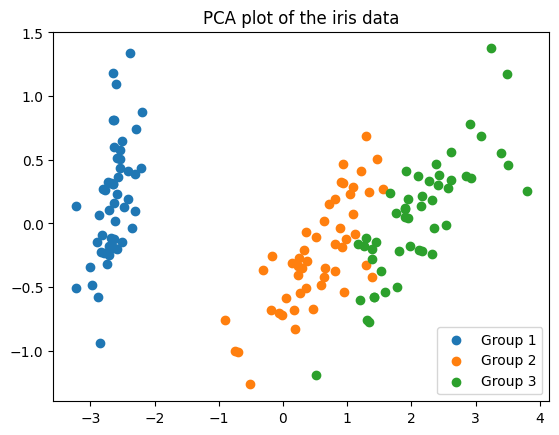

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:50, 0], X_pca[:50, 1], label='Group 1')
plt.scatter(X_pca[50:100, 0], X_pca[50:100, 1], label='Group 2')
plt.scatter(X_pca[100:150, 0], X_pca[100:150, 1], label='Group 3')
plt.legend()
plt.title('PCA plot of the iris data')
plt.show()

In [13]:
# Function to classify a new flower based on minimum entropy
def classify_new_flower_entropy(new_flower, gmm1, gmm2, gmm3):
    # Calculate entropies for each group
    entropy_group1 = -np.log(gmm1.pdf(new_flower))
    entropy_group2 = -np.log(gmm2.pdf(new_flower))
    entropy_group3 = -np.log(gmm3.pdf(new_flower))
    # Return the group with the minimum entropy
    min_entropy = min(entropy_group1, entropy_group2, entropy_group3)

    if min_entropy == entropy_group1:
        return 1  
    elif min_entropy == entropy_group2:
        return 2 
    else:
        return 3 

# Example
new_flower = np.array([5.1, 3.5, 1.4, 0.2])

# Classification using the minimum entropy criterion
predicted_group = classify_new_flower_entropy(new_flower, gmm1, gmm2, gmm3)
print("Predicted Group for New Flower:", predicted_group)

Predicted Group for New Flower: 1


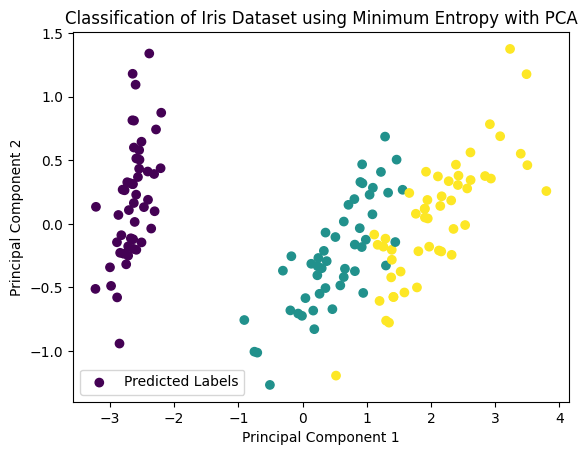

In [14]:
# Function to classify a flower based on minimum entropy
def classify_flower_entropy(flower, gmm1, gmm2, gmm3):
    # Calculate entropies for each group
    entropy_group1 = -np.log(gmm1.pdf(flower))
    entropy_group2 = -np.log(gmm2.pdf(flower))
    entropy_group3 = -np.log(gmm3.pdf(flower))
    # Return the group with the minimum entropy
    min_entropy = min(entropy_group1, entropy_group2, entropy_group3)

    if min_entropy == entropy_group1:
        return 1  
    elif min_entropy == entropy_group2:
        return 2 
    else:
        return 3 

# Classify all flowers in the iris dataset
predicted_labels = np.apply_along_axis(classify_flower_entropy, 1, X, gmm1=gmm1, gmm2=gmm2, gmm3=gmm3)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results with predicted labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', label='Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Classification of Iris Dataset using Minimum Entropy with PCA')
plt.legend()
plt.show()
